In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart_data.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.drop('education',axis=1,inplace=True)

In [6]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.BPMeds.value_counts()

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

## Fill Missing Values

In [8]:
# Import necessary libraries
import numpy as np

# Fill missing values for numeric features
numeric_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


# Check if there are any remaining missing values
missing_values = df.isnull().sum()

In [9]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Balance Data Set

In [10]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [11]:
from sklearn.utils import resample

df_majority = df[df['TenYearCHD']==0]
df_minority = df[df['TenYearCHD']==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_balanced = pd.concat([df_majority,df_minority_upsampled])

In [12]:
df_balanced.TenYearCHD.value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

## Train Test Split & Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_balanced.drop(columns=['TenYearCHD'])
y = df_balanced['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

RandomForestClassifier Accuracy : 0.9687282835302293
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       735
           1       0.95      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439

Confusion Matrix for RandomForestClassifier:
[[695  40]
 [  5 699]]
AdaBoostClassifier Accuracy : 0.6719944405837387
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       735
           1       0.66      0.68      0.67       704

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

Confusion Matrix for AdaBoostClassifier:
[[486 249]
 [223 481]]


C:\Users\AMIT\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoostingClassifier Accuracy : 0.7289784572619875
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       735
           1       0.70      0.77      0.74       704

    accuracy                           0.73      1439
   macro avg       0.73      0.73      0.73      1439
weighted avg       0.73      0.73      0.73      1439

Confusion Matrix for GradientBoostingClassifier:
[[508 227]
 [163 541]]
LogisticRegression Accuracy : 0.6587908269631688
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       735
           1       0.65      0.66      0.66       704

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439

Confusion Matrix for LogisticRegression:
[[481 254]
 [237 467]]
SVC 

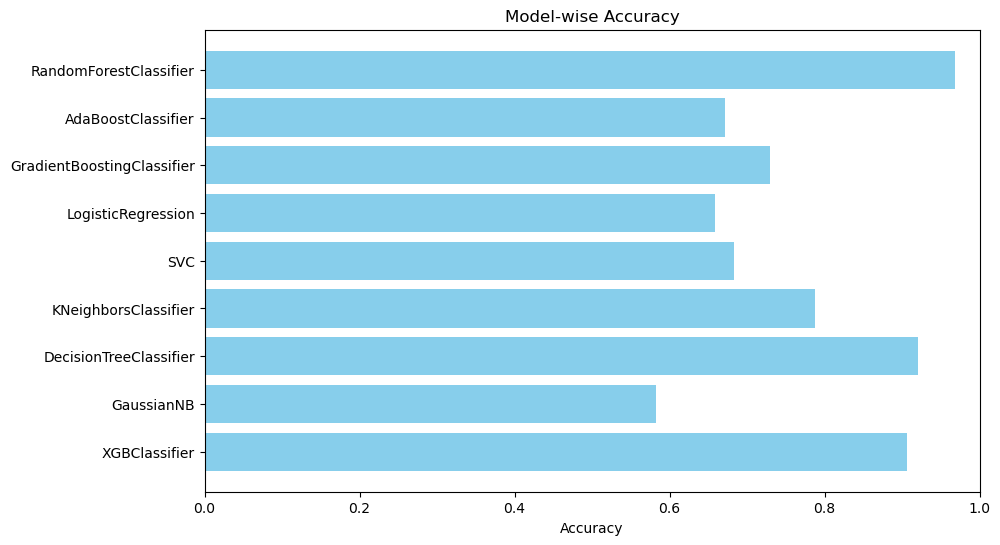

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Lists to store model names and their accuracies
model_names = []
accuracies = []

for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(clf_name)
    accuracies.append(accuracy)
    
    # Print metrics
    print(f"{clf_name} Accuracy : {accuracy}")
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

# Plotting the accuracies as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model-wise Accuracy")
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for accuracy
plt.gca().invert_yaxis()  # Invert y-axis to have highest accuracy on top
plt.show()


### Picking the best model

In [ ]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

### Single Prediction

In [32]:
print("Predicted : ",rf_classifier.predict(X_test_scaled[58].reshape(1,-1))[0])
print("Actual : ",y_test.iloc[58])

Predicted :  0
Actual :  0


In [43]:
print("Predicted : ",rf_classifier.predict(X_test_scaled[254].reshape(1,-1))[0])
print("Actual : ",y_test.iloc[254])

Predicted :  1
Actual :  1


# Save Models

In [47]:
import pickle
pickle.dump(rf_classifier,open("heartDisease.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))

In [49]:
with open("heartDisease.pkl",'rb') as file :
    re_classifier = pickle.load(file)



with open("scaler.pkl",'rb')as file :
    scaler = pickle.load(file)

In [52]:
def predict(model, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    male_encoded = 1 if male.lower() == "male" else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == "yes" else 0
    BPMeds_encoded = 1 if BPMeds.lower() == "yes" else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == "yes" else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == "yes" else 0
    diabetes_encoded = 1 if diabetes.lower() == "yes" else 0

    features = np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])
    
    # scalling
    scaled_features = scaler.transform(features)
    
    # predict by model
    result = model.predict(scaled_features)
    
    return result[0]

In [57]:
male = "male"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = 'no'
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 103.00

result = predict(rf_classifier, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)


if result == 1:
    print("The Patient has Heart Disease")
else: 
    print("The Patiennt has No Heart Disease")

The Patiennt has No Heart Disease


C:\Users\AMIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
